## Jay Chou Lyrics Common Terms

In [254]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [255]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 4


### 製作詞頻矩陣

下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的fintextmin函式

In [256]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

In [257]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## Filter meaningless terms.
list(doc_word_frequency[0].items())

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('從前', 1),
 ('從', 1),
 ('前', 1),
 ('有', 1),
 ('隻', 1),
 ('貓頭鷹', 1),
 (' ', 111),
 ('牠', 1),
 ('站', 1),
 ('在', 3),
 ('屋頂', 1),
 ('屋', 1),
 ('頂後面', 1),
 ('一片', 1),
 ('森林', 3),
 ('很安靜安靜', 1),
 ('的', 22),
 ('鋼琴', 1),
 ('大廳', 1),
 ('閣', 1),
 ('樓裡', 1),
 ('仔細', 2),
 ('聽', 4),
 ('叮叮', 1),
 ('叮', 1),
 ('什麼', 1),
 ('聲音', 1),
 ('乖乖', 4),
 ('睡', 5),
 ('不要', 2),
 ('怕', 1),
 ('我', 8),
 ('說', 6),
 ('醒來', 1),
 ('就', 2),
 ('吃', 2),
 ('蘋果', 3),
 ('不', 2),
 ('睡覺', 2),
 ('時候', 1),
 ('有傳', 2),
 ('會', 5),
 ('有人', 2),
 ('咬', 2),
 ('你', 4),
 ('小指', 2),
 ('頭', 1),
 ('這', 2),
 ('故事', 4),
 ('繼續', 4),
 ('翻頁', 4),
 ('再', 5),
 ('不想', 2),
 ('卻', 2),
 ('想', 2),
 ('睡然', 2),
 ('後', 2),
 ('準備', 4),
 ('去', 6),
 ('打', 2),
 ('開衣櫃', 2),
 ('看看', 4),
 ('躲著', 4),
 ('誰', 6),
 ('紙上', 2),
 ('城堡', 2),
 ('卡片', 2),
 ('發光', 2),
 ('立體', 2),
 ('呈現', 2),
 ('奇幻', 2),
 ('床邊', 2),
 ('動聽', 2),
 ('令人', 2),
 ('稱羨場', 2),
 ('景瞬間', 2),
 ('變化', 2),
 ('接著', 2),
 ('又', 2),
 ('施展', 2),
 ('魔法', 2),
 ('活過', 2),
 ('來', 4),
 ('話', 2),
 ('開始', 3),
 ('吧

In [258]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis=1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,掉,愛的,暗戀,耳機,痛苦,再,時候,音樂盒,一定,大學,...,數後關,上燈,離開,一天,知難,看看,在,準備,會,最貴
0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,...,3.0,6.0,0.0,0.0,0.0,4.0,3.0,4.0,5.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,2.0,2.0
3,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,2.0,0.0


### 製作TF-IDF矩陣

可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [259]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,掉,愛的,暗戀,耳機,痛苦,再,時候,音樂盒,一定,大學,...,數後關,上燈,離開,一天,知難,看看,在,準備,會,最貴
0,0.028566,0.00000,0.00000,0.00000,0.000000,0.142831,0.028566,0.028566,0.000000,0.00000,...,0.085699,0.171397,0.000000,0.000000,0.000000,0.114265,0.044721,0.114265,0.074535,0.000000
1,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.052887,0.00000,...,0.000000,0.000000,0.013222,0.000000,0.000000,0.000000,0.075897,0.000000,0.006900,0.000000
2,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.092405,0.000000,0.144663,0.000000,0.048221,0.092405
3,0.000000,0.03878,0.03878,0.03878,0.077561,0.000000,0.000000,0.000000,0.000000,0.03878,...,0.000000,0.000000,0.000000,0.077561,0.000000,0.000000,0.202371,0.000000,0.040474,0.000000


### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [260]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items()) # 檢視一下轉換結果

[('掉', 1.0),
 ('愛的', 0.0),
 ('暗戀', 0.0),
 ('耳機', 0.0),
 ('痛苦', 0.0),
 ('再', 5.0),
 ('時候', 1.0),
 ('音樂盒', 1.0),
 ('一定', 0.0),
 ('大學', 0.0),
 ('看著', 0.0),
 ('左岸', 0.0),
 ('留下', 0.0),
 ('從', 1.0),
 ('什', 0.0),
 ('歌詞', 1.0),
 ('睡覺', 2.0),
 ('Come', 3.0),
 ('妳在', 0.0),
 ('退禮物', 0.0),
 ('多久', 0.0),
 ('下', 0.0),
 ('卻', 2.0),
 ('城堡', 2.0),
 ('com', 1.0),
 ('唱', 0.0),
 ('氣球', 0.0),
 ('愛才', 0.0),
 ('沒看', 0.0),
 ('非正常', 3.0),
 ('那麼', 0.0),
 ('人往', 0.0),
 ('星空', 0.0),
 ('過的', 0.0),
 ('願', 0.0),
 ('還亮', 0.0),
 ('難', 0.0),
 ('夠遠遠', 0.0),
 ('發光', 2.0),
 ('笑容', 1.0),
 ('翻', 1.0),
 ('心裡', 0.0),
 ('活過', 2.0),
 ('今天', 0.0),
 ('一片', 1.0),
 ('稱羨場', 2.0),
 ('三年', 0.0),
 ('怕', 1.0),
 ('等', 3.0),
 ('會呵護', 0.0),
 ('詳盡', 1.0),
 ('沒有', 0.0),
 ('尋著', 0.0),
 ('裡', 0.0),
 ('夢境', 0.0),
 ('看', 0.0),
 ('床邊', 2.0),
 ('卡片', 2.0),
 ('好不好', 0.0),
 ('香水', 0.0),
 ('施展', 2.0),
 ('又', 2.0),
 ('有人', 2.0),
 ('願望', 1.0),
 ('開始', 3.0),
 ('誰', 6.0),
 ('寫給', 0.0),
 ('守護', 0.0),
 ('口', 0.0),
 ('香榭', 0.0),
 ('廣場', 0.0),
 ('畫面', 0.0),

## 文字雲

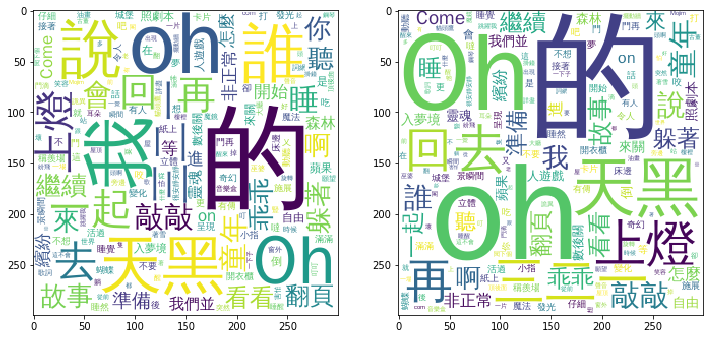

In [261]:
linux_font = r'/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

## 長條圖

可以發現，經過TF-IDF處理之後，比較重要的詞彙被突顯出來。

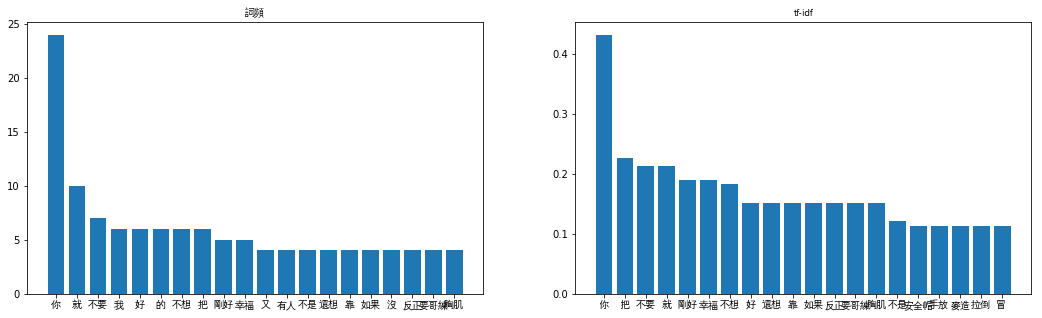

In [250]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")